In [3]:
# Reads in the crack_front_points file. dadN3Dline is the output we're concerned with.
def get_crack_front_points(input_file):
    with open(input_file, 'r') as crack_points_file:
        crack_points_file.readline()
        crack_points = []
        for line in crack_points_file:
            tokens = line.split(',')
            crack_id = tokens[0]
            theta = tokens[1]
            x = tokens[5]
            y = tokens[6]
            z = tokens[7].strip()
            dadN3Dline = tokens[3]
            if int(crack_id) > 0:
                crack_points.append((crack_id, theta, x, y, z, dadN3Dline))
    return crack_points

In [4]:
crack_front_points = get_crack_front_points('../data/crack_front_growth_rates_1500ppcf_transformed.csv')

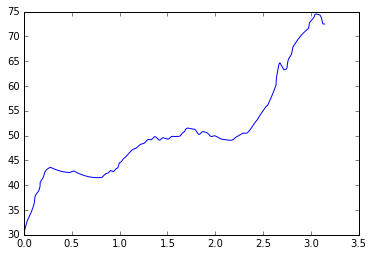

In [51]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

thetas_ = []
rs_ = []
current_crack_id = '1'
x0 = -1.9932
y0 = 363.26
for crack_front_point in crack_front_points:
    crack_id, theta, x, y, z, dadN3Dline = crack_front_point
    x = float(x)
    y = float(y)
    if crack_id == current_crack_id:
        thetas_.append(float(theta))
        dist = ((x-x0)**2 + (y-y0)**2)**.5
        rs_.append(dist)

plt.plot(thetas_, rs_)
plt.show()

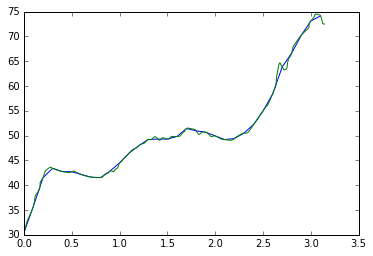

In [57]:
from scipy.interpolate import interp1d

thetas = np.array(thetas_, dtype=float)
rs = np.array(rs_, dtype=float)
f = interp1d(thetas, rs)
inputs = np.arange(0, 3.15, .1)
outputs = f(inputs)
plt.plot(inputs, outputs)
plt.plot(thetas_, rs_)
plt.show()

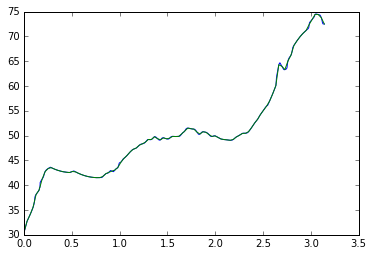

In [61]:
from scipy.interpolate import splev, splrep

thetas = np.array(thetas_, dtype=float)
rs = np.array(rs_, dtype=float)
tck = splrep(thetas, rs)
x2 = np.linspace(0, 3.14, 100)
y2 = splev(x2, tck)
plt.plot(thetas, rs, x2, y2)
plt.show()